In [1]:
import cv2 #opencv
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline 
color = ("b", "g", "r")
imgStrList = ("sample01.jpg","sample02.jpeg","sample03.jpeg","sample04.jpeg","sample05.jpeg","sample06.jpg","sample07.jpg","sample08.jpg")

In [2]:
def bgr2rbg(img):
    result = img.copy()
    result[:,:,0] = img[:,:,2]
    result[:,:,2] = img[:,:,0]
    return result

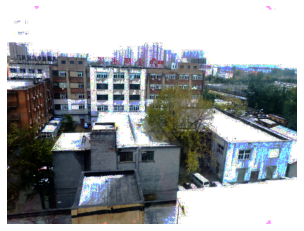

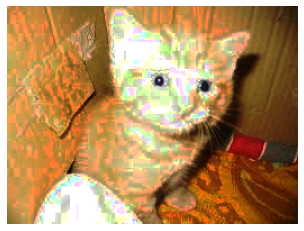

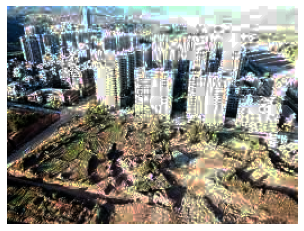

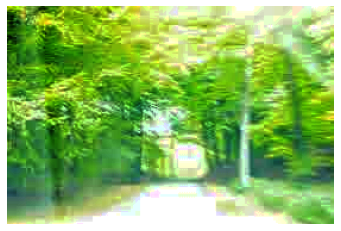

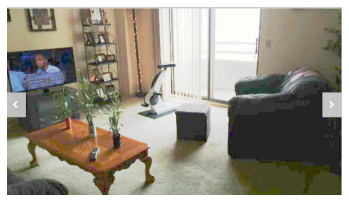

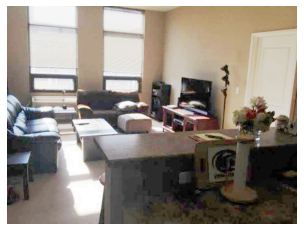

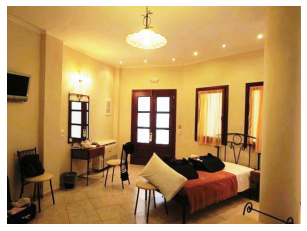

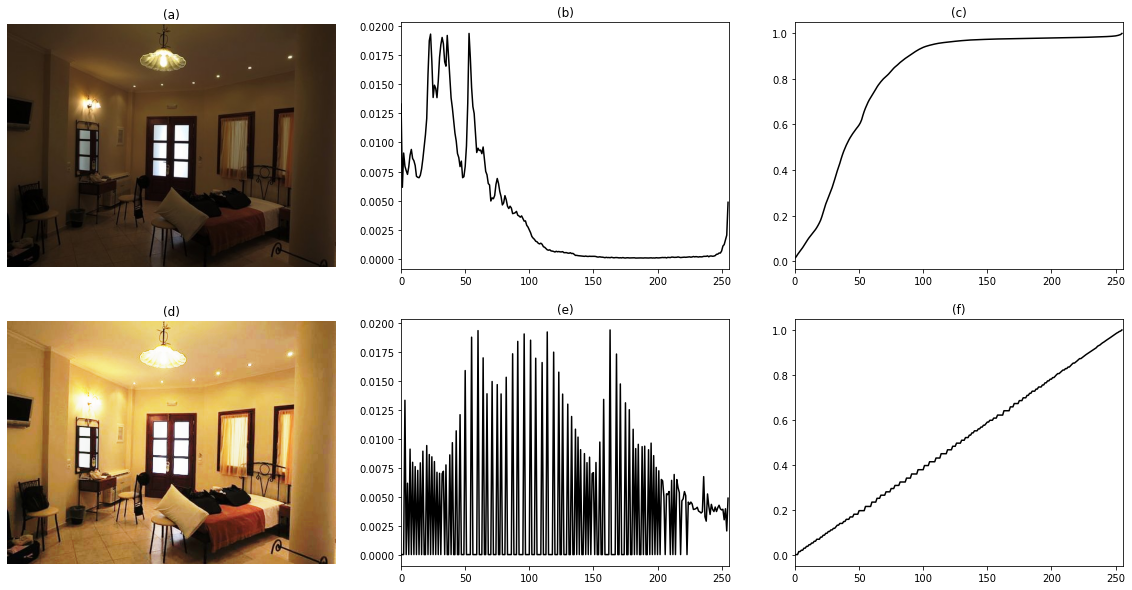

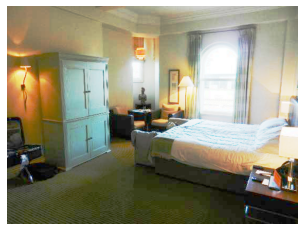

In [5]:
for imgStr in imgStrList:
    img = cv2.imread(imgStr) #彩色
    
    # pmf
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    pmf = hist/np.sum(hist)
    # cdf
    cdf = np.cumsum(pmf)
    # f(I) or s_k
    mapping = np.round((256-1)*cdf).astype("uint8")
    # transform
    HE = np.array([mapping[i] for i in img])
    
    # display
    plt.imshow(bgr2rbg(HE))
    plt.axis("off")
    plt.show()
    
    if imgStr == "sample07.jpg":
       
        hist, bins = np.histogram(HE.flatten(), 256, [0, 256])
        HEpmf = hist/np.sum(hist)
        HEcdf = np.cumsum(HEpmf)

        plt.figure(figsize=(20,10))
        plt.subplot(2,3,1)
        plt.title("(a)")
        plt.imshow(bgr2rbg(img))
        plt.axis("off")
        plt.subplot(2,3,2)
        plt.title("(b)")
        plt.plot(pmf, color = "k")
        plt.xlim([0, 256])
        plt.subplot(2,3,3)
        plt.title("(c)")
        plt.plot(cdf, color = "k")
        plt.xlim([0, 256])
        plt.subplot(2,3,4)
        plt.title("(d)")
        plt.imshow(bgr2rbg(HE))
        plt.axis("off")
        plt.subplot(2,3,5)
        plt.title("(e)")
        plt.plot(HEpmf, color = "k")
        plt.xlim([0, 256])
        plt.subplot(2,3,6)
        plt.title("(f)")
        plt.plot(HEcdf, color = "k")
        plt.xlim([0, 256])
        plt.show()